In [1]:
%pylab inline
import scipy.spatial.distance as sdist

Populating the interactive namespace from numpy and matplotlib


In [39]:
n_samples = 15
n_features = 2

gen_cov = np.eye(n_features)
gen_cov[0, 0] = 5.
gen_cov[1, 1] = 3.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
X = np.array([
        [-3, -3], [-3, -2], [-2, -2], [-2, -3], [-2.5, -2.5],
        [3, 3], [3, 2], [2, 2], [2, 3], [2.5, 2.5],
        [0, 0], [-1, -1], [-1, 1], [1, 1], [1, -1]
    ])

In [40]:
print X

[[-3.  -3. ]
 [-3.  -2. ]
 [-2.  -2. ]
 [-2.  -3. ]
 [-2.5 -2.5]
 [ 3.   3. ]
 [ 3.   2. ]
 [ 2.   2. ]
 [ 2.   3. ]
 [ 2.5  2.5]
 [ 0.   0. ]
 [-1.  -1. ]
 [-1.   1. ]
 [ 1.   1. ]
 [ 1.  -1. ]]


In [41]:
def centI(x, C):
    return np.argmin([sdist.euclidean(x, c) for c in C])

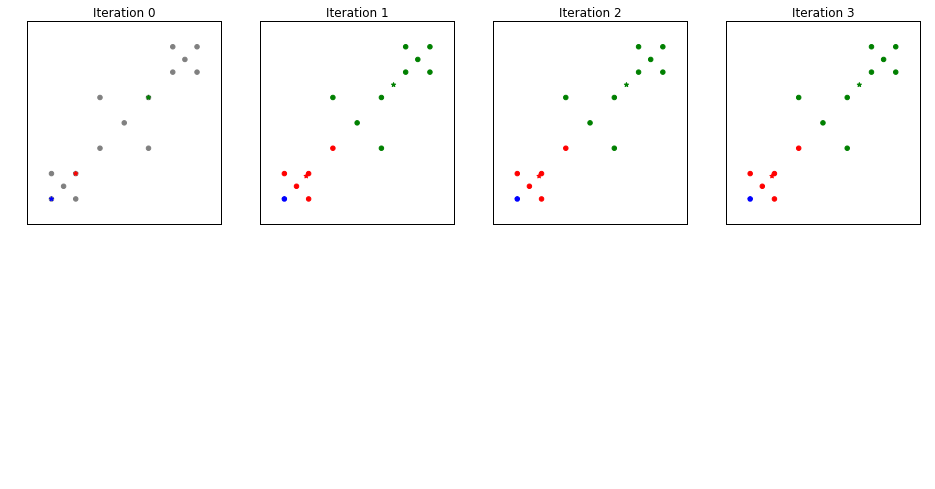

In [48]:
colors = ['red','green','blue']

k = 3
XColors = []
C = []
convergeDist = 0.00001
convergence = False
XColors.append(['grey' for x in X])

C.append(np.array(X[np.random.choice(X.shape[0], k, replace=False)]))
i = 1
while i < 4:
    # Assign points to centers
    P = {j:[] for j in xrange(k)}
    clr = []
    for x in X:
        c = centI(x, C[i-1])
        P[c].append(x)
        clr.append(colors[c])
    XColors.append(clr)
    # Calculate new centers
    C.append(np.array([np.mean(P[j],0) for j in xrange(k)]))
#     if np.linalg.norm(C[i-1] - C[i]) < convergeDist:
#         convergence = True
#     else:
    i += 1

n_rows = int((i)/4.0)+1
fig, ax = plt.subplots(n_rows, 4, sharey=True, figsize=(16,n_rows*4))

for j in xrange(i):
    subfig = plt.subplot(n_rows, 4, j+1)
    subfig = plt.subplot(n_rows, 4, j+1)
    subfig.scatter(X[:, 0], X[:, 1], color=XColors[j], marker='o')
    subfig.scatter([c[0] for c in C[j]], [c[1] for c in C[j]], color=colors, marker='*')
    subfig.set_title('Iteration %d'%(j))
    subfig.set_xticks(())
    subfig.set_yticks(())
    
# Blank out the rest
for j in xrange(i, n_rows*4):
    subfig = plt.subplot(n_rows, 4, j+1)
    subfig.axis('off')
